# 🧡💚💙 The 3rd dimension
*"I love the titles. So the movie"*

I don't know what I am writing, let's get back to the point. Yeah, we were at the point where we wanted to ***extend*** our boundries to more dimensions. Writing this notebooks is **essential** because this will let us imagine the image in multiple dimensions **as we did** in the human recognition *"project"*. And will help us the code on how to make it able to accept the images with extra dimension.

> *The color image could have been the best example for a multivariate data.*

But, no problem. We should still be good to proceed forward.

### We had the image

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('../images/indian_flag.png')

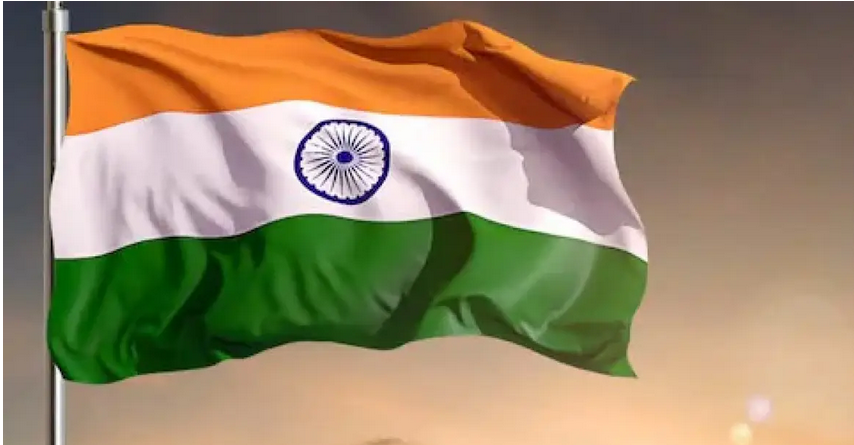

In [2]:
img

In [3]:
np.array(img).shape

(445, 854, 4)

With the dimension: `(445, 854, 4)`  the `4th` channel is for the opacity. So, basically consider 3 channels RGB only.

👉 Then we converted into a gray image

In [49]:
# converting into grayscale
imgGray = img.convert('L')

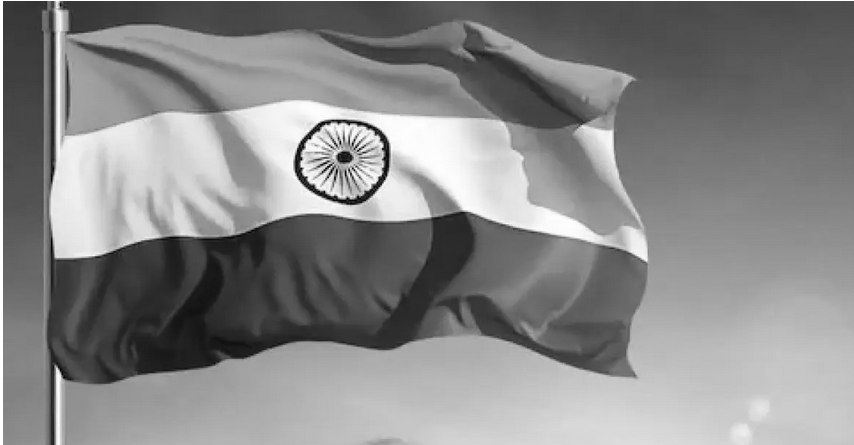

In [50]:
imgGray

In [51]:
np.array(imgGray).shape

(445, 854)

The *grayscale* image has only `1` channel and the data is in 2D.

In [52]:
imgGray = np.array(imgGray)
imgGray

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ...,  78,  78,  78],
       [255, 255, 255, ...,  78,  78,  78],
       ...,
       [255, 255, 255, ..., 199, 198, 197],
       [255, 255, 255, ..., 198, 197, 195],
       [255, 255, 255, ..., 197, 196, 195]], dtype=uint8)

This is the data, we worked with before.

In [126]:
red = np.array(img)
red[:, :, [1, 2]] = 0

green = np.array(img)
green[:, :, [0, 2]] = 0

blue = np.array(img)
blue[:, :, [0, 1]] = 0

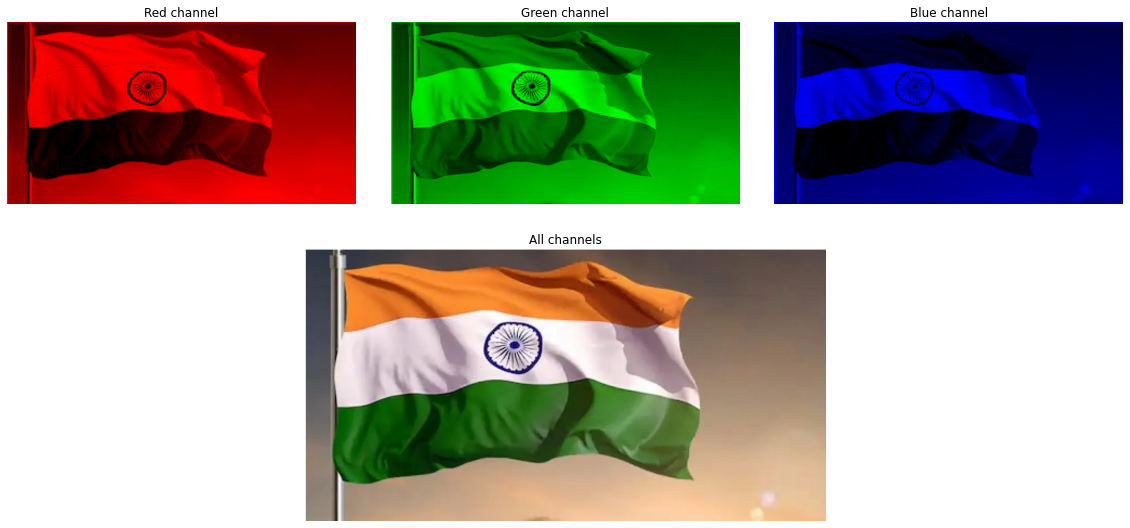

In [107]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0)

plt.figure(figsize=(20, 10))
one = plt.subplot(grid[0, 0])
two = plt.subplot(grid[0, 1])
three = plt.subplot(grid[0, 2])
big = plt.subplot(grid[1, :])

one.axis("off")
two.axis("off")
three.axis("off")
big.axis("off")

one.set_title("Red channel")
two.set_title("Green channel")
three.set_title("Blue channel")
big.set_title("All channels")

one.imshow(red)
two.imshow(green)
three.imshow(blue)
big.imshow(img);

## Which means...

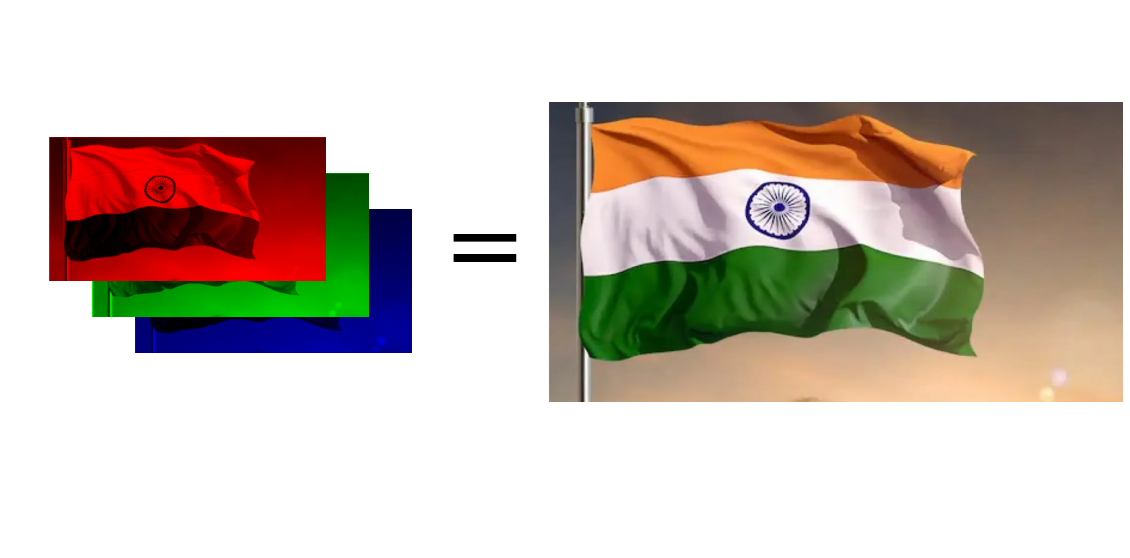

In [152]:
fig = plt.figure(figsize=(20, 10))
main_axes = plt.axes()

width = height = .2
one = plt.axes([.21, .4, width, height])
two = plt.axes([.18, .45, width, height])
three = plt.axes([.15, .5, width, height])
big = plt.axes([.5, .2, .4, .68])

one.axis("off")
two.axis("off")
three.axis("off")
big.axis("off")
main_axes.axis("off")

three.imshow(red)
two.imshow(green)
one.imshow(blue)
big.imshow(img)

main_axes.text(.39, .5, "=", fontsize=100);

### Please someone stop me...
Sometimes I overdo things consciously. A consious stupid. 🙇‍♂️
___
Since you've got the point... let's move forward.

<img src="../images/color-3d.png" height=300 width=500>

👉 So, now the filter will move in the 3D space.

<img src="../images/3d-filter.png" height=300 width=500>

## A Strange Operation
That's what I am calling. <br>
In the course, the author says to "sum-up" the output of the image after applying filter. So the summing up will ***result*** the 3D image into a 2D image.

- **Input**: $N \times M \times 3$
- **Kernel**: $T \times T \times 3$
- **Output**: $(N - T + 1)  \times (M - T + 1)$

As we can see, the output has the 2 dimensions only. 

> 😕  The thing that I didn't understand is that, why? Why to sum up? We might want our filter to work on seach channel *seperately* and result in the same 3D image! 

But, let's continue.

So to **maintain** the **uniformity** of the network *(where each layer receives and outputs the result in same like format which is acceptable for the next layer)* we will need to create ***some*** mechanism.

The above method will break the uniformity as input is 3D and output is 2D. So, you know. I think that's still doable. But the uniformity **guideline** should not be broken.

### What to do: Just stack up the 2D outputs!
Crazy? Stupid? Lo.. #%^$

- We have an image
- Have 5 filters *(say)*
    1. Detect eyes
    2. Detect nose
    3. Detect eyelids
    4. Detect eyebrows
    5. Detect lips
- These all filters result in the 5 different 2D images
- We will **stack** those images in 5 channels to **make** the image 3D.

<img src="../images/filter-stack.png" height=300 width=500>

Now, 

- We have an image **(N x M x 3)**
- We have **2** filters:
    1. Detect eyes **(T x T x 3)**
    2. Detect Nose **(T x T x 3)**
- The outputs: *[suppose outputshape == inputshape]*
    1. Filtered image 1 **(N x M)**
    2. Filtered image 2 **(N x M)**
- Stacked up output **(N x M x 2)**

> And, we can add **any** number of filters we want! So, if we have 10 filters, the output will be N x M x 10. That still is the 3D image.

<img src="../images/multiple-filter.png" height=400 width=600>

Nice summary overall. What'd you say?

# 

# So,
In the next book, we will have a look at some *relation* of convolution with ARIMA.